# Notebook Setup

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Project Phases: Stock prediction with LSTM
Here's a quick rundown of the exciting journey we'll take to build a sentiment analysis machine:

## Phase 1: Loading Libraries

Imagine a toolbox full of cool instruments – that's what these libraries are! We'll grab them to help us work with the text data (in this case, stock prices). Here, we import libraries like pandas for data manipulation, NumPy for numerical computations, and matplotlib for creating visualizations.

## Phase 2: Preprocessing Historical Stock Data

**Cleaning Up the Data:** Just like a messy room might be hard to work in, our stock data might have missing values or inconsistencies. We'll check for these and fill in any missing spots with the previous day's information to make things nice and tidy.

**Scaling the Data:** To ensure all the data points have a similar influence on our model, we'll scale them down to a range between 0 and 1. This helps the model learn more effectively.

**Preparing for the Model:** We'll focus on the closing prices of Apple stock and transform them into a format suitable for our model (a fancy machine called LSTM).

## Phase 3: Creating the LSTM Model

**Building the Model Architecture:** Here's the magic! We'll design a special machine (LSTM neural network) that can learn patterns in historical stock prices to predict future closing prices. This model architecture involves layers that process the data step-by-step.

**Compiling and Training:** We'll define how the model should learn (optimizer) and what it should aim to achieve (loss function). Then, we'll train the model by feeding it historical data, allowing it to identify patterns and improve its predictions over time.

## Phase 4: Evaluating the LSTM Model

**Testing the Model:** Once trained, we'll see how well our model performs on unseen data. We'll use a separate set of test data to evaluate its prediction accuracy.

## Phase 5: Visualizing Results

**Plotting Predictions vs. Actual Values:** To understand how well the model performed, we'll create a visual comparison. We'll plot the predicted closing prices against the actual closing prices to see how closely they match. 

# Phase 1: Fetching Historical Stock Data
Define the stock symbol and fetch historical stock data


In [8]:
# Fetch Data
stock_symbol = 'AAPL'
stock_data = yf.download(stock_symbol, start="2022-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


# Phase 2: Preprocessing Historical Stock Data

## Checking for Missing Values
First things first, we made sure our data was squeaky clean. We checked for any missing values, and if we found any, we filled them in with the previous day's information.:

In [9]:
# Check for missing values
missing_values = stock_data.isnull().sum()
if missing_values.any():
    stock_data.fillna(method='ffill', inplace=True)

## Normalizing the Data
To ensure fairness, we scaled down our data so that everything fell neatly between 0 and 1. This step helps our neural network learn more effectively by removing any biases in the data.

In [10]:
# Normalize the data
scaler = MinMaxScaler()
scaler.fit(stock_data[['Close']])
scaled_data = scaler.transform(stock_data[['Close']])

## Preparing Data for RNN
Once we had pristine data, we focused on what really matters: the closing prices of Apple stock. We extracted these and crafted them into a nice, tidy DataFrame..

In [11]:
# Define function to prepare data
def prepare_data(data, length):
    X, y = [], []
    for i in range(len(data)-length):
        X.append(data[i:i+length])
        y.append(data[i+length])
    return np.array(X), np.array(y)

In [12]:
# Prepare data
length = 31
X, y = prepare_data(scaled_data, length)

## Splitting Data into Training and Testing Sets
With our data in hand, we split it into two groups. The first chunk was earmarked for training our model, while the rest was set aside for testing its predictions.


In [13]:
# Split data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Phase 3: Creating the LSTM Model
Define the LSTM model architecture

In [34]:
# Define LSTM model
model = Sequential()
model.add(LSTM(units=32, input_shape=(length, 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 31, 32)            4352      
                                                                 
 dropout_2 (Dropout)         (None, 31, 32)            0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [37]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
11/11 [==============================] - 3s 71ms/step - loss: 0.1008 - val_loss: 0.0102
Epoch 2/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0284 - val_loss: 0.0810
Epoch 3/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0191 - val_loss: 0.0471
Epoch 4/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0159 - val_loss: 0.0215
Epoch 5/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0147 - val_loss: 0.0297
Epoch 6/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0130 - val_loss: 0.0157
Epoch 7/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0133 - val_loss: 0.0151
Epoch 8/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0127 - val_loss: 0.0100
Epoch 9/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0111 - val_loss: 0.0087
Epoch 10/50
11/11 [==============================] - 0s 17ms/step - loss: 0.0109 - val_loss: 0.0070
Epoch 11/

## Visualizing Training Loss
To see how well our model was learning, I plotted its progress over those 50 rounds. Watching that line go down is like watching a friend get better at a game with each practice session!

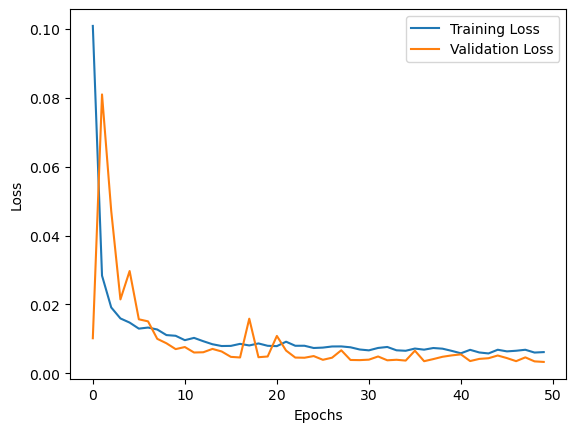

In [38]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Phase 4: Evaluating the LSTM Model

In [39]:
# Evaluate model on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

3/3 [==============================] - 0s 4ms/step


# Phase 5: Visualizing Results

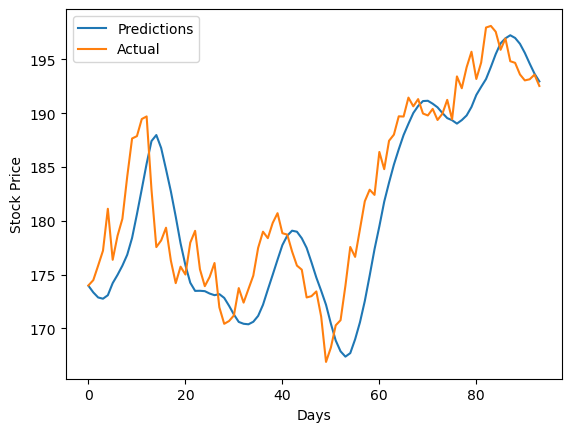

In [40]:
# Plot predictions vs actual values
plt.plot(predictions, label='Predictions')
plt.plot(scaler.inverse_transform(y_test), label='Actual')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()